In [ ]:
import numpy as np
import pandas as pd
from statistics import mode
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from rf_5 import get_bootstrap, get_subsample
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score

In [2]:
df = pd.read_csv("D:\\ds\\music_prepared.csv")

#### 1 задание

Целевой признак popularity.
- Считайте данные через pandas
- Сделайте разбиение на обучение и тест с соотношением 80/20 и random_state=1.
- Обучите дерево решений для задачи на базовых параметрах с фиксированным random_state=1 и посчитайте метрику RMSE на тренировочной и тестовой выборках.
- Обучите случайный лес для задачи на базовых параметрах с фиксированным random_state=1 и посчитайте метрику RMSE на тренировочной и тестовой выборках.

Укажите, на сколько метрика на тесте на случайном лесу лучше, чем на дереве решений, округлив до второго знака после точки.

In [ ]:
X = df.drop(columns=['popularity'])
y = df['popularity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

dt_model = DecisionTreeRegressor(random_state=1)
dt_model.fit(X_train, y_train)
y_train_pred_dt = dt_model.predict(X_train)
y_test_pred_dt = dt_model.predict(X_test)
rmse_train_dt = np.sqrt(mean_squared_error(y_train, y_train_pred_dt))
rmse_test_dt = np.sqrt(mean_squared_error(y_test, y_test_pred_dt))

print(f"RMSE на обучающей выборке (дерево решений): {rmse_train_dt:.2f}")
print(f"RMSE на тестовой выборке (дерево решений): {rmse_test_dt:.2f}")

rf_model = RandomForestRegressor(random_state=1)
rf_model.fit(X_train, y_train)
y_train_pred_rf = rf_model.predict(X_train)
y_test_pred_rf = rf_model.predict(X_test)
rmse_train_rf = np.sqrt(mean_squared_error(y_train, y_train_pred_rf))
rmse_test_rf = np.sqrt(mean_squared_error(y_test, y_test_pred_rf))

print(f"RMSE на обучающей выборке (случайный лес): {rmse_train_rf:.2f}")
print(f"RMSE на тестовой выборке (случайный лес): {rmse_test_rf:.2f}")

difference = rmse_test_dt - rmse_test_rf

print(f"Метрика RMSE на тестовой выборке для случайного леса лучше, чем для дерева решений, на {difference:.2f}")

RMSE на обучающей выборке (дерево решений): 4.50
RMSE на тестовой выборке (дерево решений): 29.99
RMSE на обучающей выборке (случайный лес): 9.18
RMSE на тестовой выборке (случайный лес): 22.78
Метрика RMSE на тестовой выборке для случайного леса лучше, чем для дерева решений, на 7.21


#### 2 задание
У модели случайный лес оставьте параметр random_state=1. Измените глубину деревьев от 1 до 50 с шагом 3.

Визуализируйте изменение ошибки RMSE на тренировочной и тестовой выборках от параметра глубины.

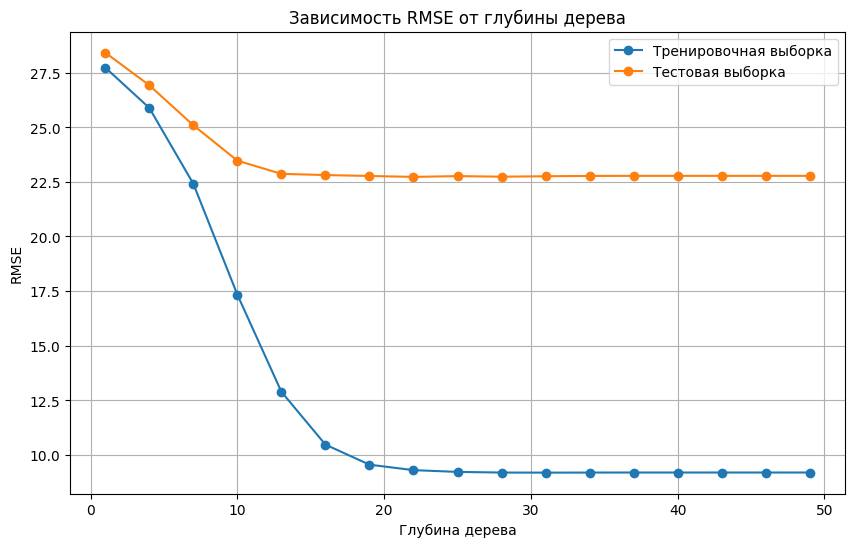

In [ ]:
rmse_train = []
rmse_test = []
depth_range = range(1, 51, 3)

for depth in depth_range:
    forest = RandomForestRegressor(random_state=1, max_depth=depth)
    forest.fit(X_train, y_train)
    y_train_pred = forest.predict(X_train)
    y_test_pred = forest.predict(X_test)
    rmse_train.append(np.sqrt(mean_squared_error(y_train, y_train_pred)))
    rmse_test.append(np.sqrt(mean_squared_error(y_test, y_test_pred)))

plt.figure(figsize=(10, 6))
plt.plot(depth_range, rmse_train, label='Тренировочная выборка', marker='o')
plt.plot(depth_range, rmse_test, label='Тестовая выборка', marker='o')
plt.xlabel('Глубина дерева')
plt.ylabel('RMSE')
plt.title('Зависимость RMSE от глубины дерева')
plt.legend()
plt.grid(True)
plt.show()

#### 3 задание
Давайте снова перейдем к задаче бинарной классификации (популярная песня/не популярная песня), для этого нужно перевести целевой признак popularity в бинарный вид:
- Если признак popularity больше 50 - 1 класс
- Если признак popularity меньше или равен 50 - 0 класс

Работайте с выборками после разбиения на обучение и тест
- Обучите дерево решений для задачи бинарной классификации с фиксированным random_state=1 и со значением глубины дерева 17.
- Посчитайте метрику accuracy на тренировочной и тестовой выборках.
- Обучите случайный лес для задачи на базовых параметрах с фиксированным `random_state=1`.
- Посчитайте метрику accuracy на тренировочной и тестовой выборках.

Укажите, на сколько метрика на тесте на случайном лесу лучше, чем на дереве решений, округлив до второго знака после точки.

In [ ]:
df['popularity_binary'] = df['popularity'].apply(lambda x: 1 if x > 50 else 0)
X = df.drop(columns=['popularity', 'popularity_binary'])
y = df['popularity_binary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
dt_model = DecisionTreeClassifier(max_depth=17, random_state=1)
dt_model.fit(X_train, y_train)
y_train_pred_dt = dt_model.predict(X_train)
y_test_pred_dt = dt_model.predict(X_test)
accuracy_train_dt = accuracy_score(y_train, y_train_pred_dt)
accuracy_test_dt = accuracy_score(y_test, y_test_pred_dt)

print(f"Accuracy на обучающей выборке (дерево решений): {accuracy_train_dt:.2f}")
print(f"Accuracy на тестовой выборке (дерево решений): {accuracy_test_dt:.2f}")

rf_model = RandomForestClassifier(random_state=1)
rf_model.fit(X_train, y_train)
y_train_pred_rf = rf_model.predict(X_train)
y_test_pred_rf = rf_model.predict(X_test)
accuracy_train_rf = accuracy_score(y_train, y_train_pred_rf)
accuracy_test_rf = accuracy_score(y_test, y_test_pred_rf)

print(f"Accuracy на обучающей выборке (случайный лес): {accuracy_train_rf:.2f}")
print(f"Accuracy на тестовой выборке (случайный лес): {accuracy_test_rf:.2f}")

difference = accuracy_test_rf - accuracy_test_dt

print(f"Метрика accuracy на тестовой выборке для случайного леса лучше, чем для дерева решений, на {difference:.2f}")

Accuracy на обучающей выборке (дерево решений): 0.98
Accuracy на тестовой выборке (дерево решений): 0.69
Accuracy на обучающей выборке (случайный лес): 0.99
Accuracy на тестовой выборке (случайный лес): 0.77
Метрика accuracy на тестовой выборке для случайного леса лучше, чем для дерева решений, на 0.08


#### 4 задание
- У модели случайный лес оставьте параметр random_state=1. Измените количество деревьев от 1 до 150 с шагом 10.
- Визуализируйте изменение метрики accuracy на тренировочной и тестовой выборках от параметра количества моделей.

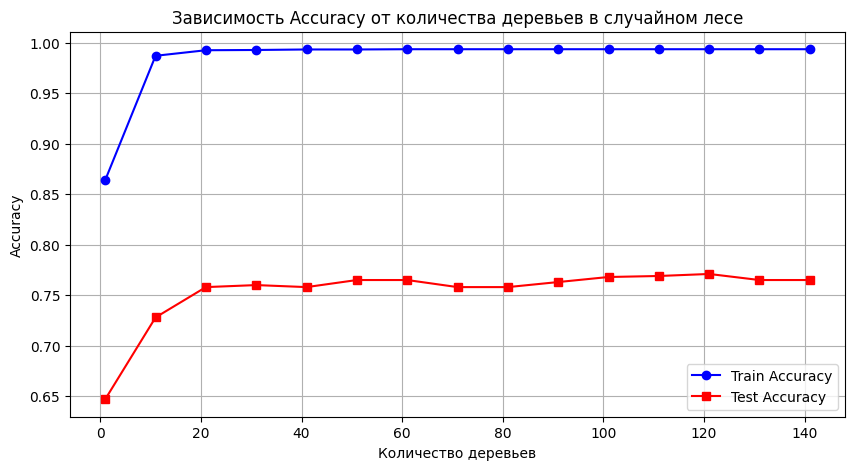

In [6]:
n_trees = list(range(1, 151, 10))
train_acc = []
test_acc = []

for n in n_trees:
    forest = RandomForestClassifier(n_estimators=n, random_state=1)
    forest.fit(X_train, y_train)
    y_train_pred = forest.predict(X_train)
    y_test_pred = forest.predict(X_test)
    train_acc.append(accuracy_score(y_train, y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))

plt.figure(figsize=(10, 5))
plt.plot(n_trees, train_acc, marker="o", linestyle="-", label="Train Accuracy", color="blue")
plt.plot(n_trees, test_acc, marker="s", linestyle="-", label="Test Accuracy", color="red")
plt.xlabel("Количество деревьев")
plt.ylabel("Accuracy")
plt.title("Зависимость Accuracy от количества деревьев в случайном лесе")
plt.legend()
plt.grid()
plt.show()

#### 5 задание
В этом задании начнём делать свой случайный лес. Для начала нужно сделать функцию для получения подвыборок для деревьев. На вход функции подаём параметры:
- data - признаки выборки
- labels - целевые значения выборки
- n - кол-во подвыборок
- max_samples - доля объектов для подвыборок

Можете воспользоваться заготовкой.

Передайте тренировочную выборку для задачи бинарной классификации в функцию get_bootstrap с параметрами n=3, max_samples=0.01.

И укажите, сколько объектов первого класса оказалось в первой (по индексу нулевой) подвыборке при самом первом запуске функции после её объявления.

In [ ]:
bootstrap_samples = get_bootstrap(X_train, y_train, n=3, max_samples=0.01)
first_sample_data, first_sample_labels = bootstrap_samples[0]
num_class_1 = np.sum(first_sample_labels == 1)

print(f"Количество объектов первого класса в первой подвыборке: {num_class_1}")

Количество объектов первого класса в первой подвыборке: 12


#### 6 задание

Теперь сделаем функцию для получения подмножества признаков.

На вход функции подаём параметры:
- features - признаки выборки
- max_features - доля признаков для подвыборок

Можете воспользоваться заготовкой.

Передайте признаки из тренировочной выборки для задачи бинарной классификации в функцию get_subsample с параметром max_features=0.1.

И укажите, какой признак вернулся после выполнения функции при самом первом запуске после её объявления.

In [ ]:
subsample_features = get_subsample(X_train.columns, max_features=0.1)

print(f"Первый признак в подвыборке: {subsample_features[0]}")

Первый признак в подвыборке: time_signature


#### 7 задание

Продолжайте работать с датасетом музыкальных композиций.

Пришло время строить случайный лес из 100 деревьев, для этого:
- Сделайте нужное количество подвыборок с половиной объектов
- Сделайте выбор половины признаков*
- Постройте 100 деревьев на подвыборках

Можете воспользоваться заготовкой.

*При построении случайного леса из sklearn выбираются случайные признаки на каждом выборе лучшего разбиения в дереве решений, но в этом задании будем выбирать случайные признаки для каждого дерева решений.

Укажите, какая глубина получилась у первого (по индексу нулевого) дерева решений.

In [ ]:
forest = []
n_trees = 100  
max_samples = 0.5 
max_features = 0.5 

bootstrap = get_bootstrap(X_train.values, y_train.values, n=n_trees, max_samples=max_samples)

for b_data, b_labels in bootstrap:
    b_data = pd.DataFrame(b_data, columns=X_train.columns)  
    feature_sample = get_subsample(X_train.columns, max_features=max_features)  
    feature_indices = [X_train.columns.get_loc(feat) for feat in feature_sample]
    b_data_subsample = b_data.iloc[:, feature_indices] 
    dt = DecisionTreeClassifier(random_state=1, max_depth=None).fit(b_data_subsample, b_labels)
    forest.append(dt)

first_tree_depth = forest[0].get_depth()
print("Глубина первого дерева решений:", first_tree_depth)

Глубина первого дерева решений: 19


#### 8 задание

Получите предсказания для тестовых объектов обученным случайным лесом из предыдущего задания.

Можно взять имена признаков из tree.feature_names_in_

Можете воспользоваться заготовкой.

Укажите, какая метрика качества accuracy получилась, округлив её до второго знака после точки.

In [ ]:
predictions = []

for tree in forest:
    features = tree.feature_names_in_
    pred = tree.predict(X_test[features])
    predictions.append(pred)

predictions_per_object = list(zip(*predictions))
voted_predictions = []

for obj in predictions_per_object:
    voted_predictions.append(mode(obj))

accuracy = accuracy_score(y_test, voted_predictions)

print(f"Accuracy на тестовой выборке: {accuracy:.2f}")

Accuracy на тестовой выборке: 0.74
